# Fashion MNIST Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Data processing

In [7]:
#Read training & test sets into corresponding
train=pd.read_csv('/content/drive/My Drive/fashion-mnist_train.csv')
test=pd.read_csv('/content/drive/My Drive/fashion-mnist_test.csv')
test.shape

(10000, 785)

In [8]:
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

scaler = StandardScaler()
x_train = torch.tensor(scaler.fit_transform(x_train), dtype=torch.float32).view(-1, 1, 28, 28)
y_train = torch.tensor(y_train.values, dtype=torch.long)
x_test = torch.tensor(scaler.transform(x_test), dtype=torch.float32).view(-1, 1, 28, 28)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(60000, 785)


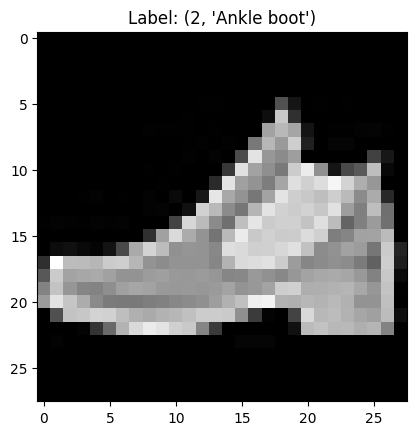

In [9]:
#Prints the shape of the train tensor
print(train.shape)

#Shows the image with corresponding label

#Changes the label from number to clothing name for readability
switch = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
def switch_case(argument):
    return switch.get(argument)

#Change this to display the image number image in the dataset. (0 indexed)
image_number = 1

#Gets the image number row and all the column values for it
image_row = train.iloc[image_number, 1:]
#sets the label of the image for readability
label = switch_case(train.iloc[image_number, 0])

#Reshapes the row to a numpy array of size 28x28
image = np.array(image_row, dtype=np.uint8).reshape(28, 28)
#Displays the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {train.iloc[0, 0], label}')
plt.show()

In [10]:
#Displays the pixel values by row
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   0,   0,  81,  21,   0,   1,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,  14, 200,  49,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   1,   1,   1,   0,
          1,   0,   0,   0, 162, 184, 165,  20,   0,   1,   1,   3,   4,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,
          0,   2,   0, 120, 183, 154, 206,  32,   0,   5,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          3,   0,  76, 227, 151, 139, 158,   0,   0,   0,   0,   0,  66,
         23,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,
          0,  55, 224, 162, 143, 121, 204, 236, 144,  21,  74,  90, 190,
          8,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         42, 228, 160, 148, 125, 165, 223, 208, 221, 246, 211, 174, 151,
          0,   0],
       [  0,   0,   0,   1,   3,   0,   1,   0,   3,   0,   9,   0,  23,
        230, 168, 147, 119, 163, 227, 206, 200, 190, 206, 186, 139, 171,
         41,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   4,   0,  16, 209,
        185, 139, 118, 181, 227, 209, 204, 210, 199, 225, 157, 127, 190,
        111,   0],
       [  1,   3,   2,   1,   3,   2,   3,   0,   0,   0,  67, 214, 187,
        139, 111, 191, 229, 203, 208, 208, 196, 223, 188, 100, 128, 155,
        112,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  48, 161, 218, 171, 147,
        116, 185, 235, 201, 209, 203, 204, 220, 208, 126, 133, 162, 164,
        187,   0],
       [  0,  12,  16,   9,   4,  19,  73, 170, 211, 188, 145, 149, 148,
        136, 222, 218, 207, 208, 215, 224, 193, 140, 146, 162, 156, 118,
        203,  37],
       [ 47, 255, 188, 187, 182, 203, 206, 182, 147, 140, 148, 148, 148,
        134, 180, 218, 221, 225, 204, 156, 134, 139, 144, 140, 123,  97,
        206,  30],
       [ 88, 203, 164, 167, 170, 161, 147, 147, 156, 159, 153, 152, 155,
        150, 134, 136, 153, 145, 136, 151, 164, 168, 170, 166, 153, 130,
        200,  10],
       [131, 195, 150, 133, 132, 142, 160, 166, 162, 153, 152, 153, 151,
        154, 163, 147, 152, 163, 205, 208, 174, 175, 178, 181, 168, 150,
        196,   1],
       [155, 228, 197, 172, 138, 123, 121, 122, 126, 129, 135, 139, 144,
        158, 177, 192, 239, 244, 178, 176, 183, 179, 185, 177, 147, 148,
        192,   0],
       [  0,  80, 196, 199, 212, 209, 190, 176, 170, 178, 183, 192, 204,
        204, 202, 144,  59,   3,   0,  67, 217, 184, 188, 178, 166, 160,
        188,  13],
       [  0,   0,   0,   3,  51, 105, 179, 217, 235, 227, 208, 201, 133,
         58,   0,   0,   0,   0,   0,  16, 187, 194, 184, 185, 175, 181,
        131,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   5,   5,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

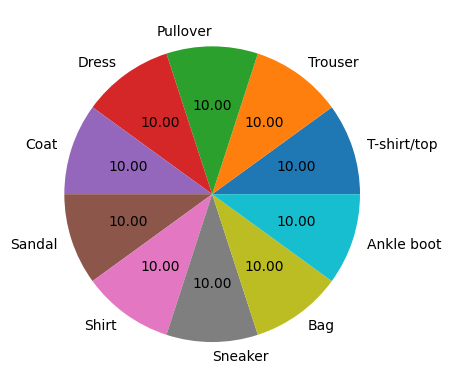

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [11]:
#Creates an array of the count of each type of item
count = train.iloc[0:, 0].value_counts().sort_index()

#Creates a piechart displaying the count of each category to ensure that there is not a biase in data
label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sizes=count.values
plt.pie(sizes, labels=label, autopct='%.2f' )
plt.show()

count

## Model

### Convolutional model

For our model, we use a combination of convolutional and linear layers, with ReLU inbetween layers. Linear layers multiply the input by a matrix A then add a bias B.
Instead of going through the picture data pixel by pixel, convolutional layers instead examines it
through a kernel, the size of which can be chosen. Square (n x n) kernels are usually used. Each n x n part of the matrix representation
of the image is multplied with another n x n matrix of values. The number of unique positions that the kernel can be is smaller than
the image size, so the feature map obtained from the multiplication is smaller than the image. This means we will lose information each
time the picture is ran through a convolutional layer. Because pixels closer the the center of the image will be in more unique positions,
they will have a larger impact on the feature map. By adding padding around the image, we can ensure that all images in the original
picture will be represented in an equal amount of positions, and also that the resulting feature map does not result in information loss.
ReLU takes max(0, x) to introduce nonlinearities.

In [12]:
class ConvolutionalModel(nn.Module):
    def __init__(self):
        super(ConvolutionalModel, self).__init__()
        self.layer_1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.layer_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.layer_3 = nn.Conv2d(24, 10, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.layer_4 = nn.Linear(10 * 28 * 28, 128)
        self.layer_5 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = self.flatten(x)
        x = torch.relu(self.layer_4(x))
        x = self.layer_5(x)
        return x


model = ConvolutionalModel()

### Hyperparameters

We choose the criterion as multiclass cross entropy loss. We do not put any weights as the training set is balanced. CES works by
taking the log of the softmax function then summing over all items in the batch and dividing by -1 * (total items)

In [13]:
num_epochs = 1
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training loop

We iterate over the images. Without getting into the details, the model calculates the gradient of the loss, and "steps" in the
direction that has the greatest negative slope. The optimizer then updates the parameters  accordingly.

In [14]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/1], Step [10/938], Loss: 2.3011
Epoch [1/1], Step [20/938], Loss: 2.2933
Epoch [1/1], Step [30/938], Loss: 2.2943
Epoch [1/1], Step [40/938], Loss: 2.2501
Epoch [1/1], Step [50/938], Loss: 2.1821
Epoch [1/1], Step [60/938], Loss: 2.1033
Epoch [1/1], Step [70/938], Loss: 1.7724
Epoch [1/1], Step [80/938], Loss: 1.3954
Epoch [1/1], Step [90/938], Loss: 1.0442
Epoch [1/1], Step [100/938], Loss: 0.7982
Epoch [1/1], Step [110/938], Loss: 1.0437
Epoch [1/1], Step [120/938], Loss: 0.8284
Epoch [1/1], Step [130/938], Loss: 0.6093
Epoch [1/1], Step [140/938], Loss: 0.9574
Epoch [1/1], Step [150/938], Loss: 0.6822
Epoch [1/1], Step [160/938], Loss: 0.8330
Epoch [1/1], Step [170/938], Loss: 0.6920
Epoch [1/1], Step [180/938], Loss: 0.6406
Epoch [1/1], Step [190/938], Loss: 0.7228
Epoch [1/1], Step [200/938], Loss: 0.9953
Epoch [1/1], Step [210/938], Loss: 0.9699
Epoch [1/1], Step [220/938], Loss: 0.5709
Epoch [1/1], Step [230/938], Loss: 0.7528
Epoch [1/1], Step [240/938], Loss: 0.6660
E

## Conclusion

In [15]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print (100*correct / total)

79.63


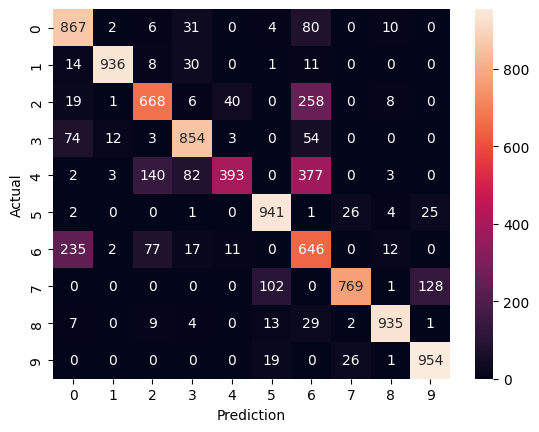

In [16]:

with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.argmax(dim=1)

y_pred_np = y_predicted_cls.numpy().flatten()
y_test_np = y_test.numpy().flatten()
conf_matrix = confusion_matrix(y_test_np, y_pred_np)

sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()
